Initial imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tICA eigenvalues

In [2]:
eigs = np.load('tica_eigs.npy')

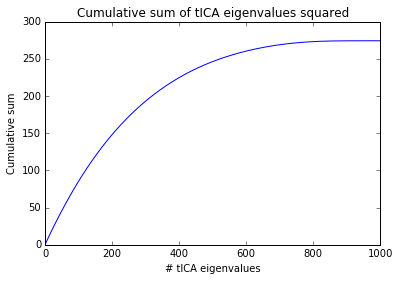

In [6]:
plt.plot(np.cumsum(eigs**2))
plt.xlabel('# tICA eigenvalues')
plt.ylabel('Cumulative sum')
plt.title('Cumulative sum of tICA eigenvalues squared')
plt.

The first 2 tICs collectively explain only a vanishingly small fraction of the total kinetic variance in these 1000 features -- slow relaxation processes are not compactly expressible as linear combinations of these features

In [12]:
np.sum((eigs**2)[:2])

1.9970623902096436

In [20]:
np.sum((eigs**2)[:603])/np.sum(eigs**2)

0.95018840337797184

In [11]:
np.sum(eigs**2)

274.25965152811267

Load the actual tICA output (603-dimensional)

In [9]:
tica = np.load('tica_output.npy')

In [10]:
Y = [traj for traj in tica]
del(tica)

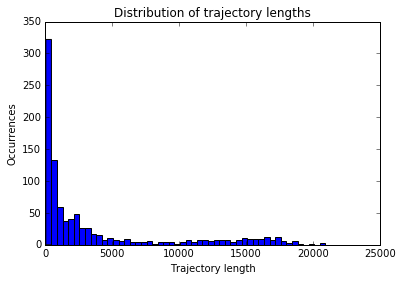

In [49]:
lens = []
for traj in Y:
    lens.append(len(traj))

plt.hist(lens,bins=50);
plt.xlabel('Trajectory length')
plt.ylabel('Occurrences')
plt.title('Distribution of trajectory lengths')

In [ ]:
sum(lens)

In [11]:
import pyemma

Find a cheap way to discretize

In [22]:
uniform_time_clustering = pyemma.coordinates.cluster_uniform_time(Y,k=100)

parameterizing UniformTimeClustering: 100% (1445/1445) [###########] eta 00:00 -

In [23]:
dtrajs = uniform_time_clustering.get_output()

getting output of UniformTimeClustering: 100% (1445/1445) [########] eta 00:00 \

The output needs to be reshaped...

In [25]:
dtrajs = [np.array(dtraj)[:,0] for dtraj in dtrajs]

estimating MaximumLikelihoodMSM: 100% (18/18) [####################] eta 00:01 -

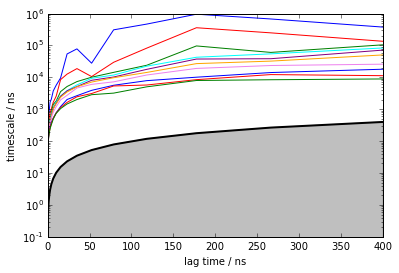

In [26]:
its = pyemma.msm.its(dtrajs,nits=10)
pyemma.plots.plot_implied_timescales(its,units='ns',dt=0.25)

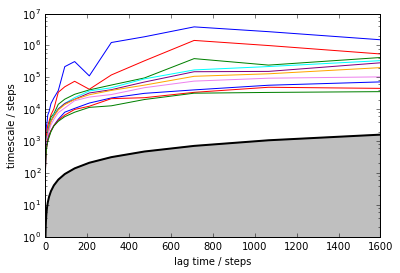

In [28]:
# without time units
pyemma.plots.plot_implied_timescales(its)

In [29]:
# where these curves start to look approximately flat
lag_time=400

In [30]:
msm = pyemma.msm.estimate_markov_model(dtrajs,lag_time)

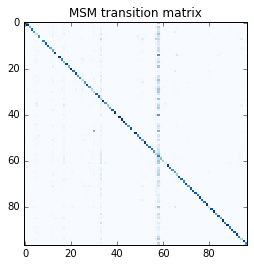

In [31]:
plt.imshow(msm.P,interpolation='none',cmap='Blues')
plt.title('MSM transition matrix')

In [32]:
np.trace(msm.P)

65.485811879523339

In [33]:
len(msm.P)

97

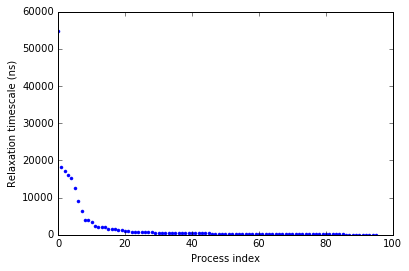

In [34]:
# hooray separation of timescales -- about ~5-10 slow processes resolvable in this discretization
plt.plot(msm.timescales()/4,'.')
plt.xlabel('Process index')
plt.ylabel('Relaxation timescale (ns)')

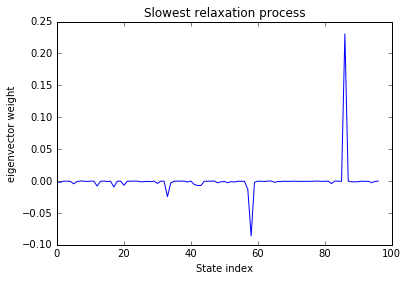

In [45]:
# what states do these correspond to?
plt.plot(msm.eigenvectors_left()[1])
plt.xlabel('State index')
plt.ylabel('eigenvector weight')
plt.title('Slowest relaxation process')

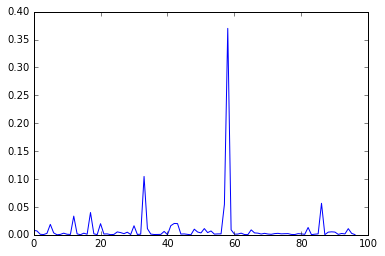

In [40]:
plt.plot(msm.stationary_distribution)

In [12]:
# trying a larger number of states
uniform_time_clustering_500 = pyemma.coordinates.cluster_uniform_time(Y,k=500)

In [6]:
dtrajs_500 = [np.array(dtraj)[:,0] for dtraj in uniform_time_clustering_500.get_output()]

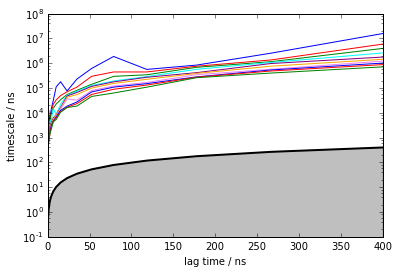

In [9]:
# captures timescales ~2 orders of magnitude slower
its = pyemma.msm.its(dtrajs_500,nits=10)
pyemma.plots.plot_implied_timescales(its,units='ns',dt=0.25)

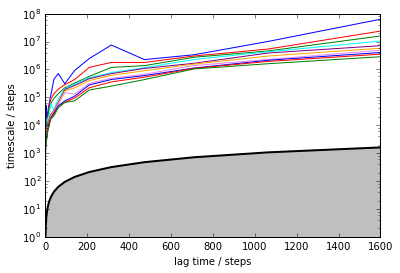

In [10]:
# without units, so we can select a lag-time in terms of frames
pyemma.plots.plot_implied_timescales(its)

In [7]:
lag_time=400

In [8]:
msm = pyemma.msm.estimate_markov_model(dtrajs_500,lag_time)

In [13]:
np.trace(msm.P)

339.43287335613627

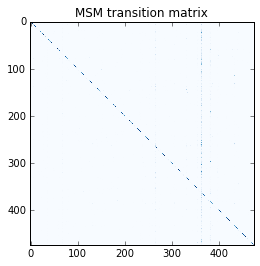

In [28]:
plt.imshow(msm.P,interpolation='none',cmap='Blues')
plt.title('MSM transition matrix')

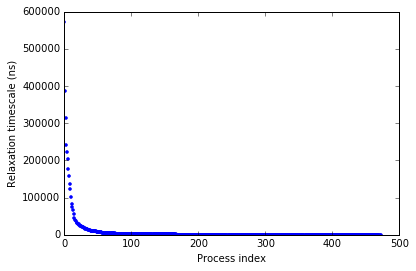

In [14]:
# woah! slowest timescale estimated is ~10 milliseconds -- a couple other processes > 1ms
plt.plot(msm.timescales()/4,'.')
plt.xlabel('Process index')
plt.ylabel('Relaxation timescale (ns)')

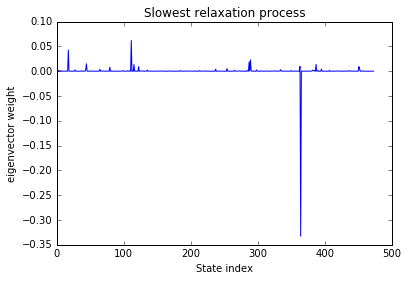

In [15]:
plt.plot(msm.eigenvectors_left()[1])
plt.xlabel('State index')
plt.ylabel('eigenvector weight')
plt.title('Slowest relaxation process')

In [16]:
np.argmax(msm.eigenvectors_left()[1])

111

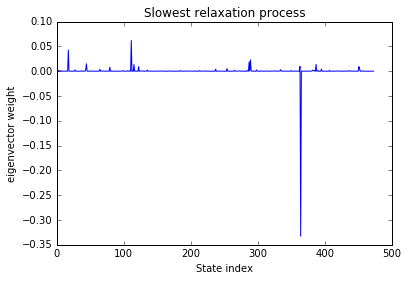

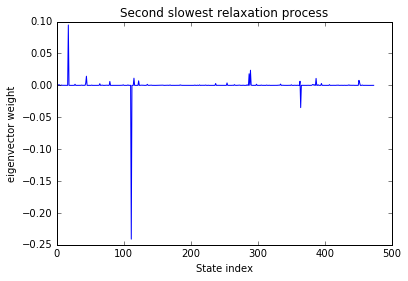

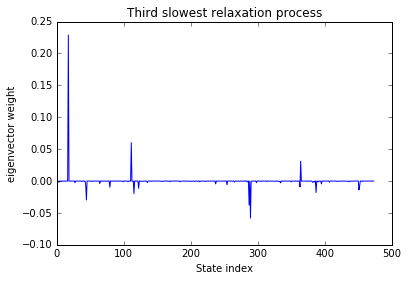

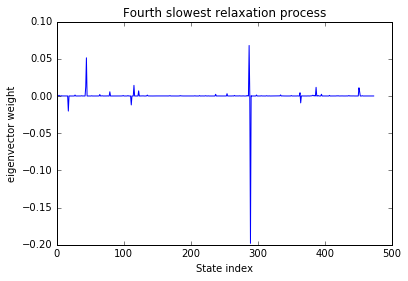

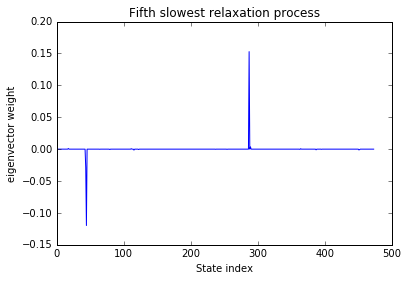

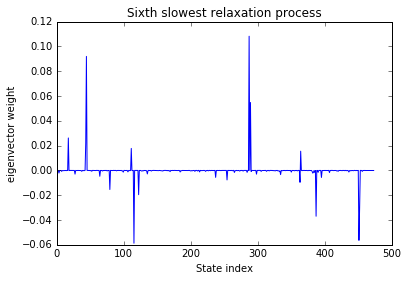

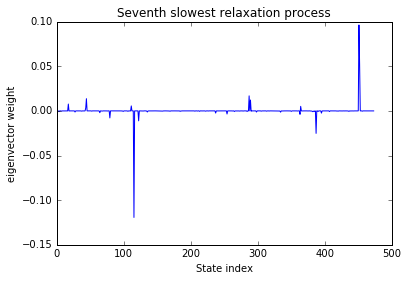

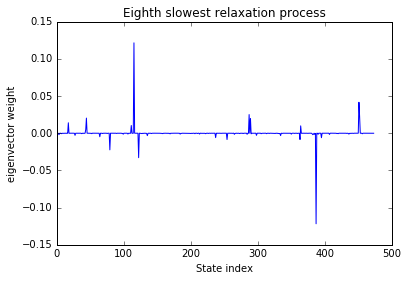

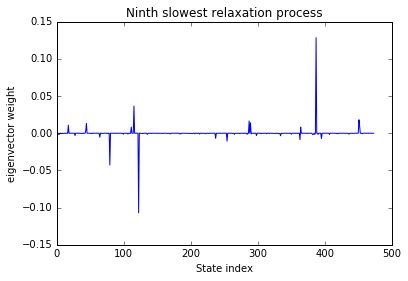

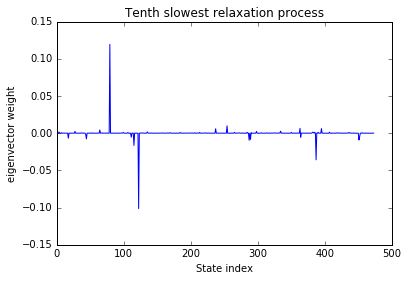

In [17]:
# let's plot the top 10 -- these will give us some interesting states to look at
names = 'Zeroth First Second Third Fourth Fifth Sixth Seventh Eighth Ninth Tenth'.split()
plt.plot(msm.eigenvectors_left()[1])
plt.xlabel('State index')
plt.ylabel('eigenvector weight')
plt.title('Slowest relaxation process')
for i in range(2,11):
    plt.figure()
    plt.plot(msm.eigenvectors_left()[i])
    plt.xlabel('State index')
    plt.ylabel('eigenvector weight')
    plt.title('{0} slowest relaxation process'.format(names[i]))

In [ ]:
# also, almost all of the states are reversibly connected. Hooray!

In [18]:
msm.active_count_fraction

0.9759647170011727

In [19]:
msm.active_state_fraction

0.948

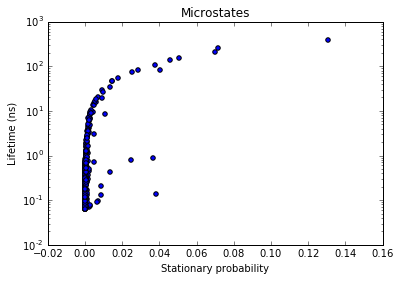

In [20]:
frames_per_nanosecond = 4.0
msm_lifetimes = (1/(1-np.diag(msm.P))) / frames_per_nanosecond

plt.scatter(msm.stationary_distribution,msm_lifetimes / frames_per_nanosecond)
plt.xlabel('Stationary probability')
plt.ylabel('Lifetime (ns)')

#plt.xscale('log')
plt.yscale('log')
plt.title('Microstates')

In [27]:
# check argmin and argmax of all of the top 10 eigenvectors
names = 'Zeroth First Second Third Fourth Fifth Sixth Seventh Eighth Ninth Tenth'.split()
for i in range(1,11):
    print('{0} slowest relaxation process'.format(names[i]))
    print(np.argmax(msm.eigenvectors_left()[i]))
    print(np.argmin(msm.eigenvectors_left()[i]))      

First slowest relaxation process
111
364
Second slowest relaxation process
17
111
Third slowest relaxation process
17
289
Fourth slowest relaxation process
287
289
Fifth slowest relaxation process
287
44
Sixth slowest relaxation process
287
115
Seventh slowest relaxation process
451
115
Eighth slowest relaxation process
115
387
Ninth slowest relaxation process
387
122
Tenth slowest relaxation process
79
122


In [30]:
np.save('dtrajs_500', dtrajs_500)

In [7]:
dir(uniform_time_clustering_500)

['_Loggable__create_logger',
 '_Loggable__ids',
 '_Loggable__refs',
 '_ProgressReporter__prog_rep_callbacks',
 '_ProgressReporter__prog_rep_descriptions',
 '_ProgressReporter__prog_rep_progressbars',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__iter__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_cleanup_logger',
 '_clear_in_memory',
 '_clustercenters',
 '_create_iterator',
 '_data_producer',
 '_default_chunksize',
 '_dtrajs',
 '_estimate',
 '_estimated',
 '_estimator_type',
 '_filenames',
 '_get_model_param_names',
 '_get_param_names',
 '_idx_to_traj_idx',
 '_in_memory',
 '_index_states',
 '_is_random_accessible',
 '_is_reader',
 '_lengths',
 '_logger',
 '_logger_instance'

In [8]:
clustercenters = uniform_time_clustering_500.clustercenters

In [11]:
filenames = uniform_time_clustering_500.filenames

In [ ]:
index_clusters = uniform_time_clustering_500.index_clusters

In [14]:
np.save('clustercenters', clustercenters)

In [ ]:
np.save('index_clusters', index_clusters)